In [1]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Fetch the dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 

# Extract features and target variable
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [3]:
# check the shape of the data
print("Shape of the dataset:", X.shape)

Shape of the dataset: (253680, 21)


In [4]:
# check the first few rows of the data
print("First few rows of the data:")
X.head()

First few rows of the data:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [5]:
# check column datatypes
print("Column data types:")
X.info()

Column data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth       

In [6]:
# check missing values
print("Missing values in each column:")
X.isnull().sum()

Missing values in each column:


HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
# check statistical summary
print("Statistical summary of the dataset:")
X.describe()

Statistical summary of the dataset:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
# check duplicate rows
print("Number of duplicate rows in the dataset:", X.duplicated().sum())

Number of duplicate rows in the dataset: 25772


In [9]:
# Remove duplicate rows and corresponding target values
X = X.drop_duplicates()
y = y.iloc[X.index]

In [10]:
# Verify the shapes after removing duplicates
print("Shape of X after removing duplicates:", X.shape)
print("Shape of y after removing duplicates:", y.shape)

Shape of X after removing duplicates: (227908, 21)
Shape of y after removing duplicates: (227908, 1)


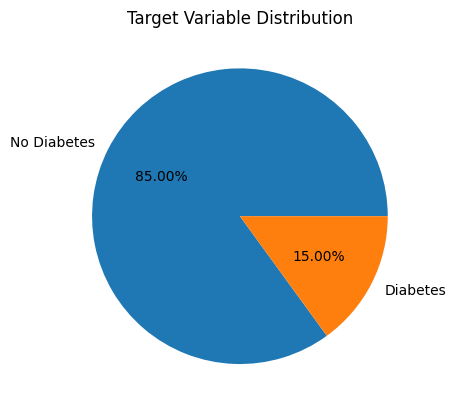

In [11]:
# Check the distribution of the target variable
plt.pie(y.value_counts(normalize=True), labels=['No Diabetes', 'Diabetes'], autopct='%1.2f%%')
plt.title('Target Variable Distribution')
plt.show()

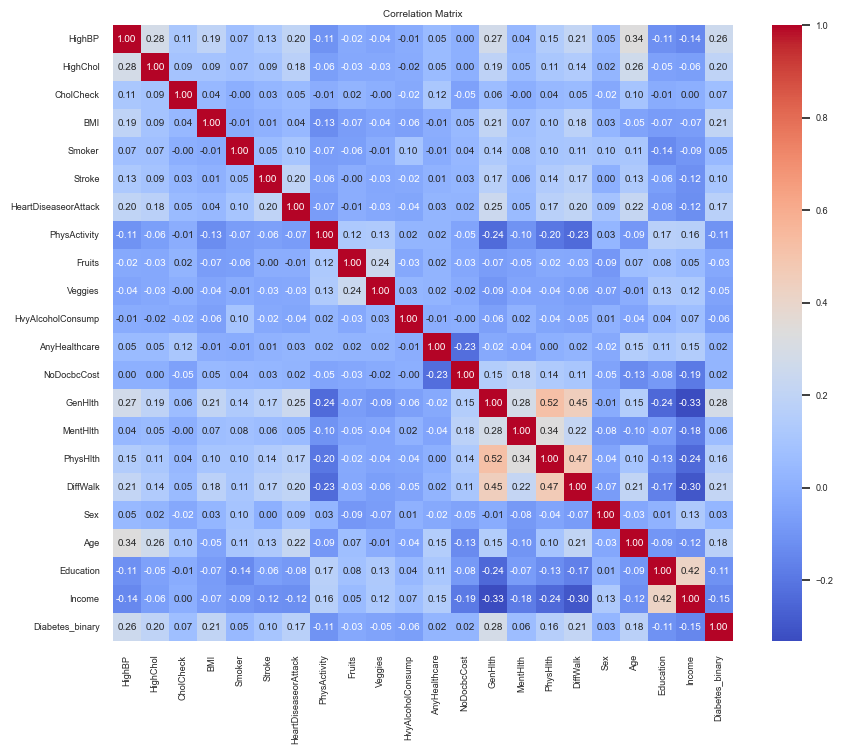

In [12]:
# Plot the correlation matrix
corr = pd.concat([X,y], axis = 1).corr()
plt.figure(figsize=(10,8))
sns.set_theme(font_scale=0.6)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix');

# Data Preprocessing

In [13]:
# Balance the dataset through over-sampling
df = pd.concat([X, y], axis=1)
class_0 = df[df['Diabetes_binary'] == 0]
class_1 = df[df['Diabetes_binary'] == 1]
class_1_over = class_1.sample(len(class_0), replace=True)
df_new = pd.concat([class_1_over, class_0], axis=0)

In [14]:
# Separate features and target variable
X = df_new.drop('Diabetes_binary', axis=1)
y = df_new['Diabetes_binary']

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training and Evaluation

In [16]:
# Define a function to train and evaluate models
def train_evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {np.round(accuracy*100,2)}%')
    print(f'Precision: {np.round(precision*100,2)}%')
    print(f'Recall: {np.round(recall*100,2)}%')
    print(f'F1 Score: {np.round(f1*100,2)}%')
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    sns.set_theme(font_scale = 0.8)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, precision, recall, f1

### Logistic Regression

Accuracy: 73.88%
Precision: 73.91%
Recall: 73.88%
F1 Score: 73.87%


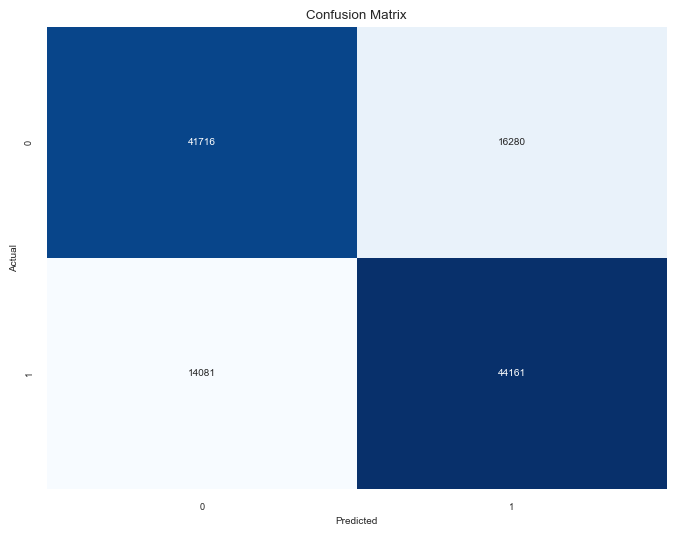

In [17]:
lr_accuracy, lr_precision, lr_recall, lr_f1 =  train_evaluate_model(LogisticRegression(random_state=123, solver='liblinear'))

### Decision Tree Classifier

Accuracy: 91.37%
Precision: 92.28%
Recall: 91.37%
F1 Score: 91.32%


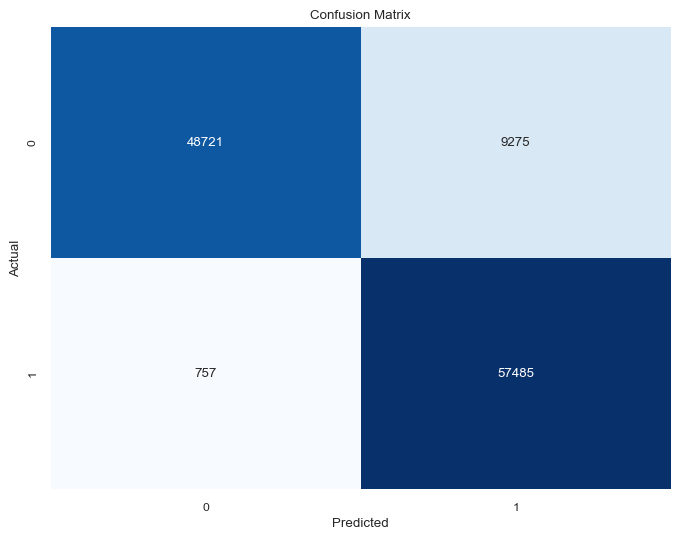

In [18]:
dt_accuracy, dt_precision, dt_recall, dt_f1 = train_evaluate_model(DecisionTreeClassifier(random_state=123))

### Random Forest Classifier

Accuracy: 94.07%
Precision: 94.46%
Recall: 94.07%
F1 Score: 94.05%


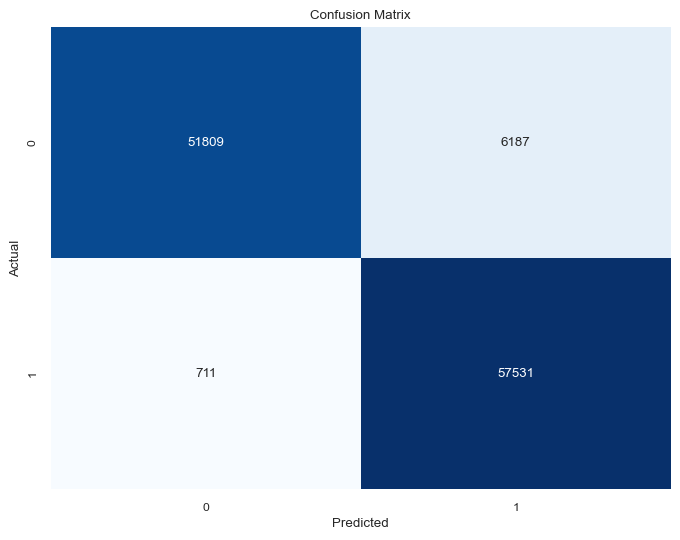

In [19]:
rf_accuracy, rf_precision, rf_recall, rf_f1 = train_evaluate_model(RandomForestClassifier(random_state=123))

### XGB Classifier

Accuracy: 76.29%
Precision: 76.54%
Recall: 76.29%
F1 Score: 76.23%


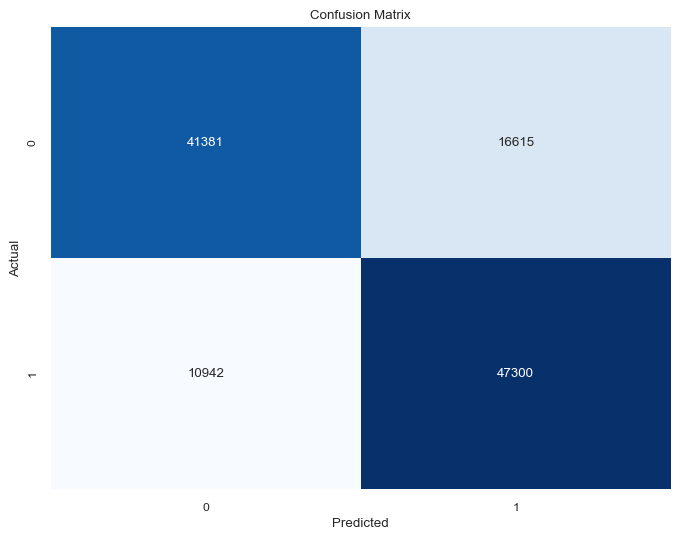

In [20]:
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = train_evaluate_model(XGBClassifier(random_state=123))

### Extra Trees Classifier

Accuracy: 95.92%
Precision: 96.05%
Recall: 95.92%
F1 Score: 95.92%


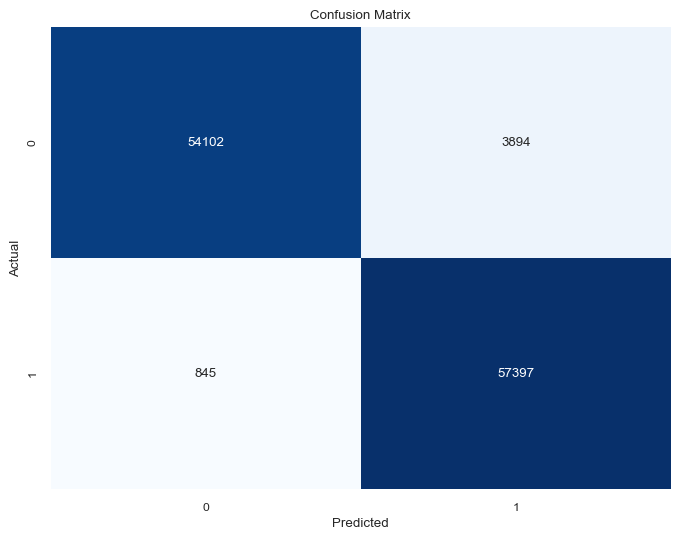

In [21]:
extra_trees_accuracy, extra_trees_precision, extra_trees_recall, extra_trees_f1 = train_evaluate_model(ExtraTreesClassifier(random_state=123))

## Comparative Evaluation

In [22]:
# Compare the performance of different models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Extra Trees']
accuracy = [lr_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, extra_trees_accuracy]
precision = [lr_precision, dt_precision, rf_precision, xgb_precision, extra_trees_precision]
recall = [lr_recall, dt_recall, rf_recall, xgb_recall, extra_trees_recall]
f1 = [lr_f1, dt_f1, rf_f1, xgb_f1, extra_trees_f1]

performance = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
performance

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.738803,0.739125,0.738803,0.738699
1,Decision Tree,0.913694,0.922754,0.913694,0.913215
2,Random Forest,0.940656,0.944593,0.940656,0.940518
3,XGBoost,0.762926,0.765407,0.762926,0.762335
4,Extra Trees,0.959230,0.960493,0.959230,0.959200


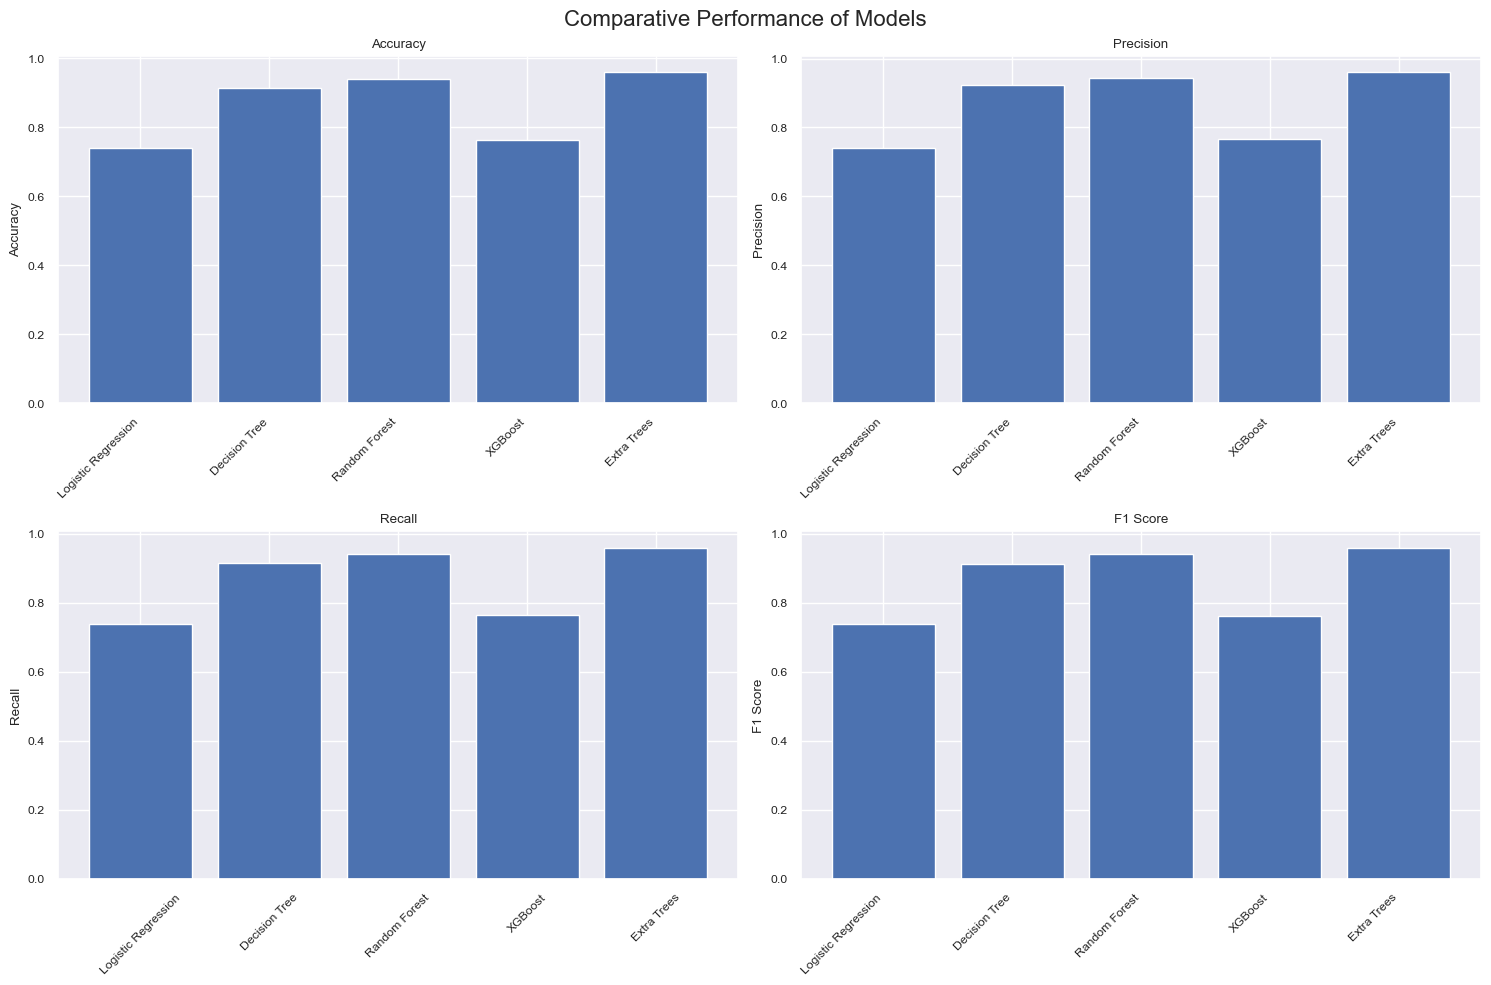

In [35]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot Accuracy
axes[0, 0].bar(performance['Model'], performance['Accuracy'])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xticklabels(performance['Model'], rotation=45, ha='right')

# Plot Precision
axes[0, 1].bar(performance['Model'], performance['Precision'])
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_xticklabels(performance['Model'], rotation=45, ha='right')

# Plot Recall
axes[1, 0].bar(performance['Model'], performance['Recall'])
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_xticklabels(performance['Model'], rotation=45)

# Plot F1 Score
axes[1, 1].bar(performance['Model'], performance['F1 Score'])
axes[1, 1].set_title('F1 Score')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_xticklabels(performance['Model'], rotation=45, ha='right')

# Adjust layout
fig.suptitle('Comparative Performance of Models', fontsize=16)
plt.tight_layout()
plt.show()